#### Import Modules

In [1]:
# Analysis
import numpy as np
import pandas as pd

# Plot Visualization
import matplotlib.pyplot as plt 

#### Read the Data
- Casualty Data of Accidents in England and Wales in 2022

In [2]:
df = pd.read_csv("Data/dft-road-casualty-statistics-casualty-2022.csv", dtype={"accident_index": str, "accident_reference": str})
df.sample(5)

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
39777,2022070705257,2022,070705257,2,1,1,2,28,6,3,0,0,0,0,0,9,1,2,E01012506
61796,2022201263636,2022,201263636,1,1,1,1,30,6,3,0,0,0,0,0,3,1,1,E01009762
103525,2022461134160,2022,461134160,2,4,2,2,52,8,3,0,0,1,0,0,9,1,4,E01016168
103022,2022451244477,2022,451244477,1,1,1,2,47,8,3,0,0,0,0,0,9,1,10,E01030487
69433,2022302201517,2022,302201517,2,1,1,2,49,8,3,0,0,0,0,0,9,1,3,E01019541


#### Convert All Data Types to String and Replace '-1's with NaN

In [3]:
df = df.astype(str)
df.replace('-1', pd.NA, inplace=True)
df.describe()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
count,135480,135480,135480,135480,135480,135480,134403,132351,132351,135480,135477,135479,134855,135411,135220,135451,122184,121526,116799
unique,106004,1,106004,17,19,3,3,102,11,3,11,10,4,6,3,22,3,10,31104
top,2022010356595,2022,010356595,1,1,1,1,18,6,3,0,0,0,0,0,9,1,2,E01019456
freq,16,135480,16,80304,104962,89770,82746,3407,27952,107949,116153,116153,112590,133568,132645,72759,98949,15159,65


#### Casualty Class (casualty_class)
- Driver / Rider (1)
- Passenger (2)
- Pedestrian (3)

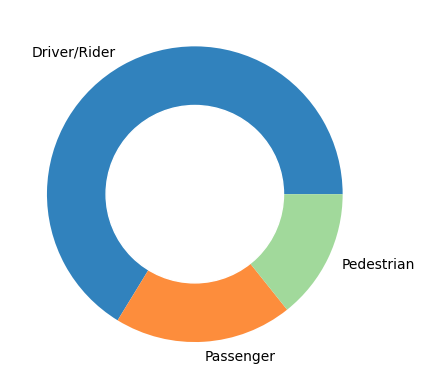

In [51]:
df2 = df.copy()

variable = 'casualty_class'
types = {
    '1': 'Driver/Rider',
    '2': 'Passenger',
    '3': 'Pedestrian'
}

statistics = df2[variable].value_counts(normalize=True, sort=True).reset_index()
statistics = statistics.dropna()
statistics[variable] = statistics[variable].apply(lambda _id: types[_id])
statistics['percentage'] = statistics['proportion'] * 100

fig, ax = plt.subplots()
colors = plt.get_cmap('tab20c')(np.linspace(0, 0.5, len(types)))
ax.pie(statistics['percentage'], labels=statistics[variable], colors=colors, radius=1, center=(0, 0),
       wedgeprops={"linewidth": 0, "edgecolor": "white"}, frame=False)
centre_circle = plt.Circle((0, 0), 0.6, color='white')
fig.gca().add_artist(centre_circle)
plt.show()

In [52]:
statistics

,casualty_class,proportion,percentage
0,Driver/Rider,0.662607,66.260703
1,Passenger,0.194737,19.473723
2,Pedestrian,0.142656,14.265574


In [19]:
# save the plot
fig.savefig('Plots/casualty_class.jpg', bbox_inches='tight')

#### Pedestrian Location (pedestrian_location)
- Crossing on pedestrian crossing facility (1)
- Crossing in zig-zag approach lines (2)
- Crossing in zig-zag exit lines (3)
- Crossing elsewhere within 50m of pedestrian crossing (4)
- In carriageway, crossing elsewhere (5)
- On footway or verge (6)
- On refuge, central island or central reservation (7)
- In centre of carriageway - not on refuge, island or central reservation (8)
- In carriageway, not crossing (9)
- Unknown or other (10)

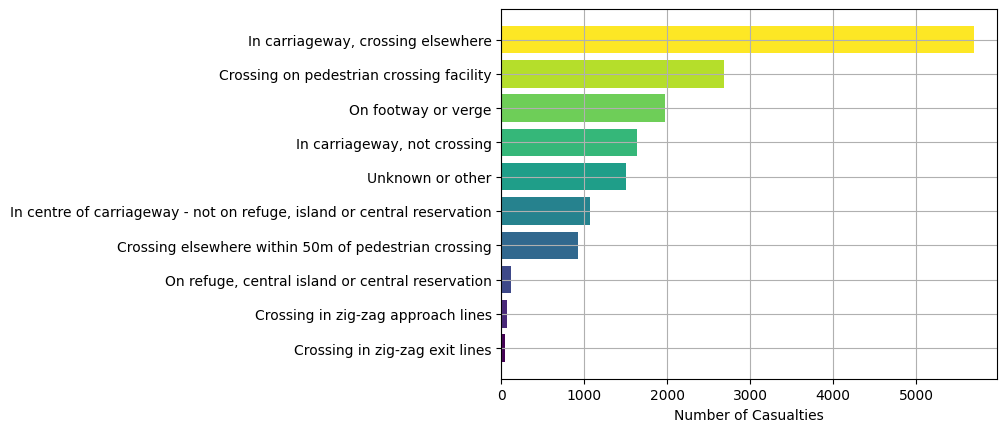

In [26]:
df2 = df.copy()

variable = 'pedestrian_location'
types = {
    '1': 'Crossing on pedestrian crossing facility',
    '2': 'Crossing in zig-zag approach lines',
    '3': 'Crossing in zig-zag exit lines',
    '4': 'Crossing elsewhere within 50m of pedestrian crossing',
    '5': 'In carriageway, crossing elsewhere',
    '6': 'On footway or verge',
    '7': 'On refuge, central island or central reservation',
    '8': 'In centre of carriageway - not on refuge, island or central reservation',
    '9': 'In carriageway, not crossing',
    '10': 'Unknown or other'
}

df2[variable] = df2[variable].replace('0', pd.NA)
df2 = df2.dropna()

statistics = df2[variable].value_counts(normalize=False, sort=True, ascending=True).reset_index()
statistics[variable] = statistics[variable].apply(lambda _id: types[_id])

fig, ax = plt.subplots()
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(statistics)))
ax.barh(statistics[variable], statistics['count'], color=colors)
plt.xlabel('Number of Casualties')
plt.grid()
plt.show()

In [27]:
# save the plot
fig.savefig('Plots/pedestrian_location.jpg', bbox_inches='tight')

#### Pedestrian Movement (pedestrian_movement)
- Crossing from driver's nearside (1)
- Crossing from nearside - masked by parked or stationary vehicle (2)
- Crossing from driver's offside (3)
- Crossing from offside - masked by  parked or stationary vehicle (4)
- In carriageway, stationary - not crossing  (standing or playing) (5)
- In carriageway, stationary - not crossing  (standing or playing) - masked by parked or stationary vehicle (6)
- Walking along in carriageway, facing traffic (7)
- Walking along in carriageway, back to traffic (8)
- Unknown or other (9)

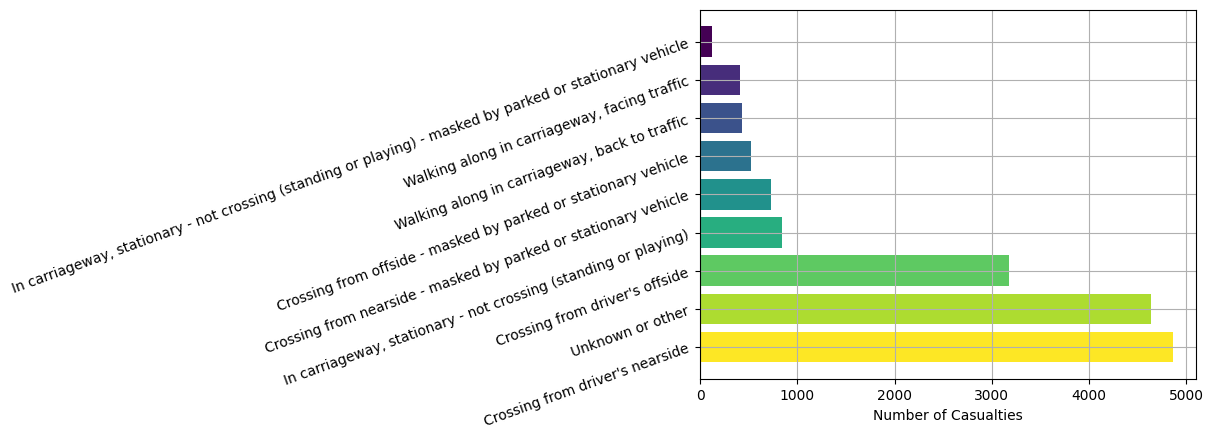

In [23]:
df2 = df.copy()

variable = 'pedestrian_movement'
types = {
    '1': "Crossing from driver's nearside",
    '2': 'Crossing from nearside - masked by parked or stationary vehicle',
    '3': "Crossing from driver's offside",
    '4': 'Crossing from offside - masked by parked or stationary vehicle',
    '5': 'In carriageway, stationary - not crossing (standing or playing)',
    '6': 'In carriageway, stationary - not crossing (standing or playing) - masked by parked or stationary vehicle',
    '7': 'Walking along in carriageway, facing traffic',
    '8': 'Walking along in carriageway, back to traffic',
    '9': 'Unknown or other'
}

df2[variable] = df2[variable].replace('0', pd.NA)
df2 = df2.dropna()

statistics = df2[variable].value_counts(normalize=False, sort=True, ascending=False).reset_index()
statistics[variable] = statistics[variable].apply(lambda _id: types[_id])

fig, ax = plt.subplots()
colors = plt.get_cmap('viridis')(np.linspace(1, 0, len(statistics)))
ax.barh(statistics[variable], statistics['count'], color=colors)
plt.yticks(rotation=20, ha='right')
plt.xlabel('Number of Casualties')
plt.grid()
plt.show()

In [25]:
# save the plot
fig.savefig('Plots/pedestrian_movement.jpg', bbox_inches='tight')

#### Car Passenger (car_passenger)
- Front seat passenger (1)
- Rear seat passenger (2)
- Unknown (9)

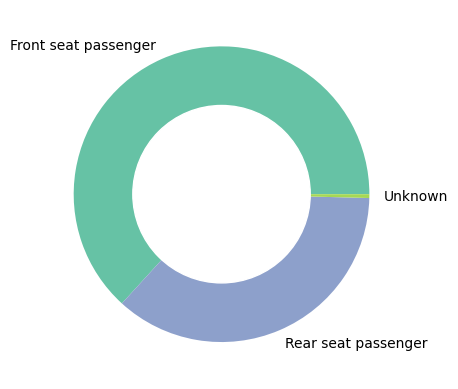

In [28]:
df2 = df.copy()

variable = 'car_passenger'
types = {
    '1': 'Front seat passenger',
    '2': 'Rear seat passenger',
    '9': 'Unknown'
}

df2[variable] = df2[variable].replace('0', pd.NA)
df2 = df2.dropna()

statistics = df2[variable].value_counts(normalize=True, sort=True, ascending=False).reset_index()
statistics[variable] = statistics[variable].apply(lambda _id: types[_id])

fig, ax = plt.subplots()
colors = plt.get_cmap('Set2')(np.linspace(0, 0.5, len(types)))
ax.pie(statistics['proportion'], labels=statistics[variable], colors=colors, radius=1, center=(0, 0),
       wedgeprops={"linewidth": 0, "edgecolor": "white"}, frame=False)
centre_circle = plt.Circle((0, 0), 0.6, color='white')
fig.gca().add_artist(centre_circle)
plt.show()

In [29]:
# save the plot
fig.savefig('Plots/car_passenger.jpg', bbox_inches='tight')

#### Bus or Coach Passenger Type (bus_or_coach_passenger)
- Boarding (1)
- Alighting (2)
- Standing passenger (3)
- Seated passenger (4)
- Unknown (9)

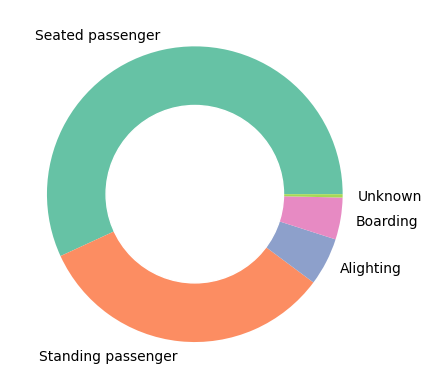

In [49]:
df2 = df.copy()

variable = 'bus_or_coach_passenger'
types = {
    '1': 'Boarding',
    '2': 'Alighting',
    '3': 'Standing passenger',
    '4': 'Seated passenger',
    '9': 'Unknown'
}

df2[variable] = df2[variable].replace('0', pd.NA)
df2 = df2.dropna()

statistics = df2[variable].value_counts(normalize=True, sort=True, ascending=False).reset_index()
statistics[variable] = statistics[variable].apply(lambda _id: types[_id])

fig, ax = plt.subplots()
colors = plt.get_cmap('Set2')(np.linspace(0, 0.5, len(types)))
ax.pie(statistics['proportion'], labels=statistics[variable], colors=colors, radius=1, center=(0, 0),
       wedgeprops={"linewidth": 0, "edgecolor": "white"}, frame=False)
centre_circle = plt.Circle((0, 0), 0.6, color='white')
fig.gca().add_artist(centre_circle)
plt.show()

In [50]:
# save the plot
fig.savefig('Plots/bus_or_coach_passenger.jpg', bbox_inches='tight')

#### Casualty Sex (sex_of_casualty)
- Male (1)
- Female (2)
- Unknown (9)

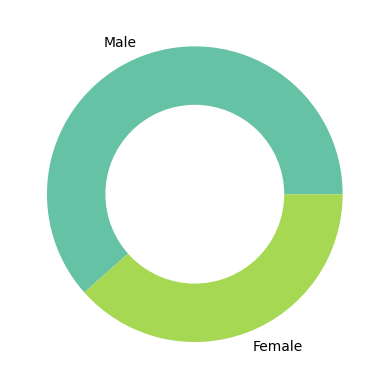

In [32]:
df2 = df.copy()

variable = 'sex_of_casualty'
types = {
    '1': 'Male',
    '2': 'Female',
}

statistics = df2[variable].value_counts(normalize=True, sort=True).reset_index()
statistics.replace('9', pd.NA, inplace=True)
statistics = statistics.dropna()
statistics[variable] = statistics[variable].apply(lambda _id: types[_id])
statistics['percentage'] = statistics['proportion'] * 100

fig, ax = plt.subplots()
colors = plt.get_cmap('Set2')(np.linspace(0, 0.5, len(types)))
ax.pie(statistics['percentage'], labels=statistics[variable], colors=colors, radius=1, center=(0, 0),
       wedgeprops={"linewidth": 0, "edgecolor": "white"}, frame=False)
centre_circle = plt.Circle((0, 0), 0.6, color='white')
fig.gca().add_artist(centre_circle)
plt.show()

In [33]:
# save the plot
fig.savefig('Plots/casualty_sex.jpg', bbox_inches='tight')

#### Casualty Age (age_of_casualty)

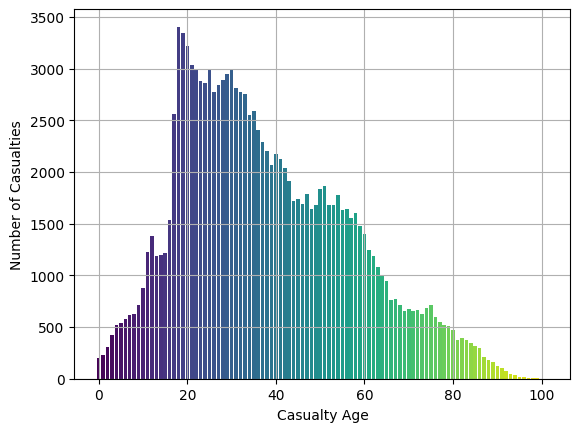

In [34]:
df2 = df.copy()

variable = 'age_of_casualty'

statistics = df2[variable].value_counts(normalize=False, sort=False).reset_index()
statistics = statistics.dropna()
statistics[variable] = statistics[variable].astype(int)
statistics = statistics.sort_values(by=variable)

fig, ax = plt.subplots()
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(statistics)))
ax.bar(statistics[variable], statistics['count'], color=colors)
plt.grid()
plt.xlabel("Casualty Age")
plt.ylabel("Number of Casualties")
plt.show()

In [35]:
# save the plot
fig.savefig('Plots/age_of_casualty.jpg', bbox_inches='tight')

#### Casualty Age Band (age_band_of_casualty)
|Age Band|1|2|3|4|5|6|7|8|9|10|11|
|-|-|-|-|-|-|-|-|-|-|-|-|
|Age Interval|0-5|6-10|11-15|16-20|21-25|26-35|36-45|46-55|56-65|66-75|76-120|

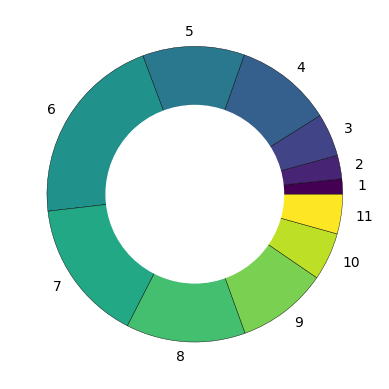

In [36]:
df2 = df.copy()

variable = 'age_band_of_casualty'

statistics = df2[variable].value_counts(normalize=True, sort=False).reset_index()
statistics = statistics.dropna()
statistics[variable] = statistics[variable].astype(int)
statistics = statistics.sort_values(by=variable)
statistics['percentage'] = statistics['proportion'] * 100

fig, ax = plt.subplots()
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(statistics)))
ax.pie(statistics['percentage'], labels=statistics[variable], colors=colors, radius=1, center=(0, 0),
       wedgeprops={"linewidth": 0.3, "edgecolor": "black"}, frame=False)
centre_circle = plt.Circle((0, 0), 0.6, color='white')
fig.gca().add_artist(centre_circle)
plt.show()

In [37]:
# save the plot
fig.savefig('Plots/casualty_age_band.jpg', bbox_inches='tight')

#### Casualty Severity (casualty_severity)
- Fatal (1)
- Serious (2)
- Slight (3)

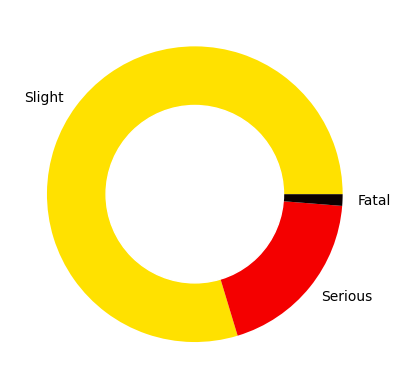

In [38]:
df2 = df.copy()

variable = 'casualty_severity'
types = {
    '1': 'Fatal',
    '2': 'Serious',
    '3': 'Slight'
}

statistics = df2[variable].value_counts(normalize=True, sort=True).reset_index()
statistics = statistics.dropna()
statistics[variable] = statistics[variable].apply(lambda _id: types[_id])
statistics['percentage'] = statistics['proportion'] * 100

fig, ax = plt.subplots()
colors = plt.get_cmap('hot')(np.linspace(0.7, 0, len(types)))
ax.pie(statistics['percentage'], labels=statistics[variable], colors=colors, radius=1, center=(0, 0),
       wedgeprops={"linewidth": 0, "edgecolor": "black"}, frame=False)
centre_circle = plt.Circle((0, 0), 0.6, color='white')
fig.gca().add_artist(centre_circle)
plt.show()

In [39]:
# save the plot
fig.savefig('Plots/casualty_severity.jpg', bbox_inches='tight')

### Casualty Type (casualty_type)

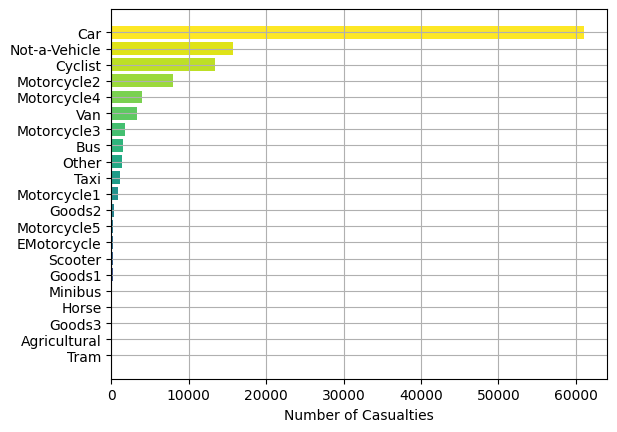

In [43]:
df2 = df.copy()

variable = 'casualty_type'
types = {
    '0': 'Not-a-Vehicle', '1': 'Cyclist', '2': 'Motorcycle1', '3': 'Motorcycle2', '4': 'Motorcycle3', '5': 'Motorcycle4',\
    '8': 'Taxi', '9': 'Car', '10': 'Minibus', '11': 'Bus', '16': 'Horse', '17': 'Agricultural', '18': 'Tram',\
    '19': 'Van', '20': 'Goods1', '21': 'Goods2', '22': 'Scooter', '23': 'EMotorcycle', '90': 'Other', '97': 'Motorcycle5',\
    '98': 'Goods3', '99': 'Unknown'
}

# df2[variable] = df2[variable].replace('0', pd.NA)
df2 = df2.dropna()

statistics = df2[variable].value_counts(normalize=False, sort=True, ascending=True).reset_index()
statistics[variable] = statistics[variable].apply(lambda _id: types[_id])

fig, ax = plt.subplots()
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(statistics)))
ax.barh(statistics[variable], statistics['count'], color=colors)
plt.xlabel('Number of Casualties')
plt.grid()
plt.show()

In [44]:
# save the plot
fig.savefig('Plots/casualty_type.jpg', bbox_inches='tight')

#### Casualty Home Area Type (casualty_home_area_type)
- Urban area (1)
- Small town (2)
- Rural (3)

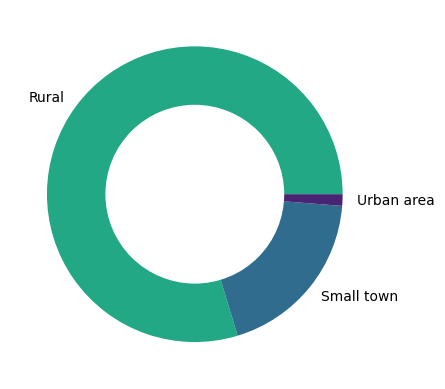

In [45]:
df2 = df.copy()

variable = 'casualty_severity'
types = {
    '1': 'Urban area',
    '2': 'Small town',
    '3': 'Rural'
}

statistics = df2[variable].value_counts(normalize=True, sort=True).reset_index()
statistics = statistics.dropna()
statistics[variable] = statistics[variable].apply(lambda _id: types[_id])
statistics['percentage'] = statistics['proportion'] * 100

fig, ax = plt.subplots()
colors = plt.get_cmap('viridis')(np.linspace(0.6, 0.1, len(types)))
ax.pie(statistics['percentage'], labels=statistics[variable], colors=colors, radius=1, center=(0, 0),
       wedgeprops={"linewidth": 0, "edgecolor": "black"}, frame=False)
centre_circle = plt.Circle((0, 0), 0.6, color='white')
fig.gca().add_artist(centre_circle)
plt.show()

In [46]:
# save the plot
fig.savefig('Plots/casualty_home_area_type.jpg', bbox_inches='tight')

#### Casualty IMD Decile (casualty_imd_decile)
- 1 to 10 from most deprived to least deprived.

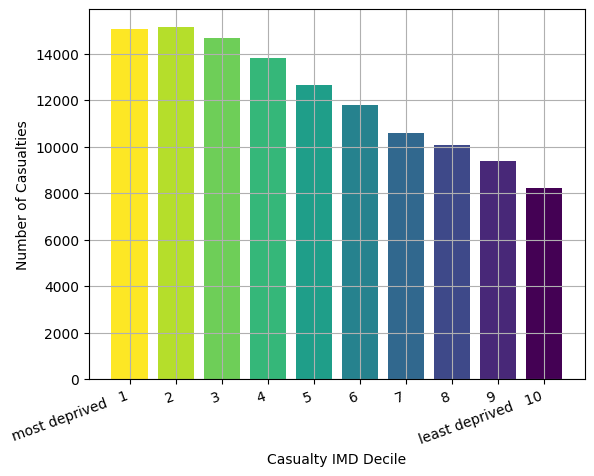

In [47]:
df2 = df.copy()

variable = 'casualty_imd_decile'
types = {
    '1': 'most deprived   1',
    '2': '2',
    '3': '3',
    '4': '4',
    '5': '5',
    '6': '6',
    '7': '7',
    '8': '8',
    '9': '9',
    '10': 'least deprived   10'
}

statistics = df2[variable].value_counts(normalize=False, sort=False).reset_index()
statistics = statistics.dropna()
statistics[variable] = statistics[variable].astype(int)
statistics = statistics.sort_values(by=variable)
statistics[variable] = statistics[variable].apply(lambda _id: types[str(_id)])

fig, ax = plt.subplots()
colors = plt.get_cmap('viridis')(np.linspace(1, 0, len(statistics)))
ax.bar(statistics[variable], statistics['count'], color=colors)
plt.xticks(rotation=20, ha='right')
plt.grid()
plt.xlabel("Casualty IMD Decile")
plt.ylabel("Number of Casualties")
plt.show()

In [48]:
# save the plot
fig.savefig('Plots/casualty_imd_decile.jpg', bbox_inches='tight')